<a href="https://colab.research.google.com/github/Ilvecho/yKv6QC0ApiFAR8p7/blob/main/Notebook_for_dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import torch

from google.colab import files
files.upload()


Saving ACME-HappinessSurvey2020.csv to ACME-HappinessSurvey2020 (1).csv


{'ACME-HappinessSurvey2020.csv': b'Y,X1,X2,X3,X4,X5,X6\r\n0,3,3,3,4,2,4\r\n0,3,2,3,5,4,3\r\n1,5,3,3,3,3,5\r\n0,5,4,3,3,3,5\r\n0,5,4,3,3,3,5\r\n1,5,5,3,5,5,5\r\n0,3,1,2,2,1,3\r\n1,5,4,4,4,4,5\r\n0,4,1,4,4,4,4\r\n0,4,4,4,2,5,5\r\n0,3,2,3,3,2,3\r\n0,4,4,3,4,4,4\r\n1,5,2,4,5,5,5\r\n0,4,2,4,5,4,3\r\n0,4,1,3,3,4,3\r\n1,3,2,4,3,4,4\r\n0,5,3,4,5,4,5\r\n1,5,1,4,3,4,5\r\n0,5,1,2,4,4,5\r\n0,4,2,4,4,4,4\r\n1,4,2,3,3,4,4\r\n0,4,3,5,5,5,4\r\n0,4,3,5,5,5,4\r\n1,5,1,2,5,2,4\r\n1,4,3,3,3,3,4\r\n0,3,4,3,3,2,3\r\n1,3,3,3,5,5,5\r\n1,3,3,1,3,3,4\r\n1,3,3,1,3,3,4\r\n1,5,3,3,3,5,3\r\n0,5,3,3,3,5,3\r\n0,4,1,3,4,4,5\r\n1,3,2,4,4,4,5\r\n1,3,2,4,4,4,5\r\n1,4,1,3,1,1,4\r\n0,4,2,3,3,4,4\r\n1,5,3,4,3,4,5\r\n1,5,3,4,3,4,5\r\n1,5,2,3,3,2,5\r\n1,4,4,3,4,2,4\r\n0,5,2,3,3,3,3\r\n1,4,2,4,3,2,4\r\n0,5,2,3,3,4,5\r\n0,4,3,3,4,2,4\r\n1,3,1,2,4,3,5\r\n1,5,3,4,4,4,5\r\n1,5,3,3,4,4,5\r\n0,1,1,1,3,1,4\r\n1,5,2,5,5,5,3\r\n1,5,1,3,3,4,4\r\n1,5,1,3,3,4,4\r\n1,5,1,3,3,4,4\r\n1,5,2,4,3,4,5\r\n1,5,2,4,3,4,5\r\n1,4,3,2,4,3,4\r\n1,4,3,2

In [110]:
from torch import nn

In [111]:
class SingleLayerPerceptron(nn.Module):
  def __init__(self, input_dim):
    super().__init__()
    self.stack = nn.Sequential(
        nn.Linear(input_dim, 1),
        nn.Sigmoid(),
        # nn.Hardtanh(0,1)
        # nn.Softmax(dim=1)
    )
  
  def forward(self, x):
    logits = self.stack(x)
    return logits

In [112]:
def DataLoader(file_name, split: float):

    data = pd.read_csv(file_name)
    
    attributes = torch.tensor(data.drop('Y', axis=1).values).float()
    # torch.div(attributes, 5.0)
    labels = torch.tensor(data['Y'].values).unsqueeze_(1)
   
    # split the dataset in training and validation
    train_attributes = attributes[:int(attributes.shape[0]*split)].float()
    val_attributes = attributes[int(attributes.shape[0]*split):].float()

    train_labels = labels[:int(attributes.shape[0]*split)].float()
    val_labels = labels[int(attributes.shape[0]*split):].float()
    
    return train_attributes, val_attributes, train_labels, val_labels

In [113]:
train_attributes, val_attributes, train_labels, val_labels = DataLoader('ACME-HappinessSurvey2020.csv', 0.90)

In [136]:
learning_rate = 0.5
input_dim = 6

model = SingleLayerPerceptron(input_dim)
# loss_fn = nn.CrossEntropyLoss()
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [137]:
l = model.state_dict()
print(l)

OrderedDict([('stack.0.weight', tensor([[-0.1508,  0.3812,  0.3424, -0.2934,  0.0226, -0.2991]])), ('stack.0.bias', tensor([-0.3237]))])


In [138]:
# train loop - we use the full dataset every time, and repeat for few epochs
N_EPOCHS = 15000

losses = []
accuracies = []
iter = []

for e in range(N_EPOCHS):
  outputs = model(train_attributes)
  loss = loss_fn(outputs, train_labels)

  if e % 5000 == 0:
    optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

  if e % 10000 == 0:
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

  if e % 1000 == 0:
    
    pred = outputs.round().detach().numpy()
    good_pred = np.sum(pred == train_labels.detach().numpy())
    accuracy = 100 * good_pred/pred.size
    # print(f'Epoch {e} --------------- \nLoss: {loss} \nAccuracy: {accuracy}')

    losses.append(loss.item())
    accuracies.append(accuracy)
    iter.append(e)

  loss.backward()
  optimizer.step()
  optimizer.zero_grad()



In [139]:
l = model.state_dict()
print(l)

OrderedDict([('stack.0.weight', tensor([[ 0.4865, -0.1968,  0.1319, -0.0042,  0.2566,  0.3775]])), ('stack.0.bias', tensor([-4.3519]))])


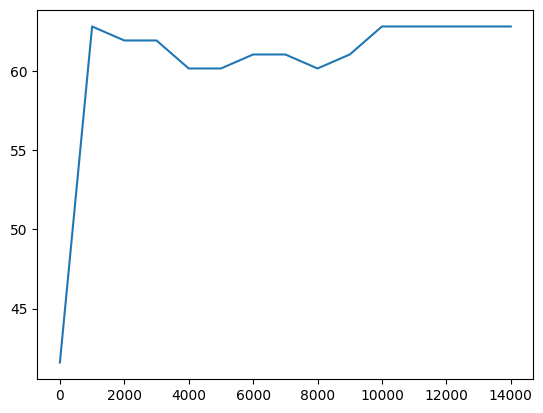

In [140]:
import matplotlib.pyplot as plt
plt.plot(iter, accuracies)

In [ ]:
pred = model(val_attributes)
print(pred)
print(val_labels)
print(loss_fn(pred, val_labels))

tensor([[0.2197, 0.7803],
        [0.3639, 0.6361],
        [0.2417, 0.7583],
        [0.7049, 0.2951],
        [0.1545, 0.8455],
        [0.4067, 0.5933],
        [0.4528, 0.5472],
        [0.6639, 0.3361],
        [0.2990, 0.7010],
        [0.4753, 0.5247],
        [0.3942, 0.6058],
        [0.4188, 0.5812],
        [0.3836, 0.6164]], grad_fn=<SoftmaxBackward0>)
tensor([[1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.]])
tensor(0.7171, grad_fn=<DivBackward1>)
